# **Atharva Sapkal**
# **Student id:-6847190**

In [1]:
from datasets import load_metric, load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from datasets import load_metric, load_dataset
import pandas as pd

In [3]:
datasets = load_dataset("surrey-nlp/PLOD-CW")

In [4]:
datasets

DatasetDict({
    train: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 1072
    })
    validation: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 126
    })
    test: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 153
    })
})

In [5]:
combined_datasets = load_dataset("surrey-nlp/PLOD-CW",split='train[:100%]+validation[:100%]+test[:100%]')


In [6]:
combined_datasets

Dataset({
    features: ['tokens', 'pos_tags', 'ner_tags'],
    num_rows: 1351
})

# **1.Data Analysis**


The dataset that we are working with is a part of the scientific literature in the PLOS Journal, specifically in the Biomedical Domain. Our goal is to perform sequence classification for Abbreviation (AC) and Long Form detection (LF) and create a sequence classifier prototype using the provided data. However, since multiple tokens or words can belong to the same long form, we will be using the BIO format to address this issue.The dataset is part of the scientific literature in PLOS Journal(Biomedical Domain). The aim is to perform Sequence classification for Abbreviation (AC) and Long Form detection (LF) build a sequence classifier prototype for the data provided. Now since multiple tokens/words can belong to the same long form the solution to this is BIO format.

In our data:

The tokens labelled with B-O or (O) = tokens that are neither AC nor LF.
The tokens labelled with B-AC = tokens that are AC
The tokens labelled with B-LF = tokens that are LF 'begins' with this token.
The tokens labelled with I-LF = the token is 'inside' of a LF.
POS(part-of-speech).
In this coursework:

Dataset - PLOD-CW( english language dataset of AC and LF) tagged in text with ID column starting at 0, tokens consist of English texts, part-of-speech tags obtained for corresponding token from spacy NER eg. nouns,adjectives,pronouns,punctuation. ner_tags consisted of tag for abbreviation & long form.

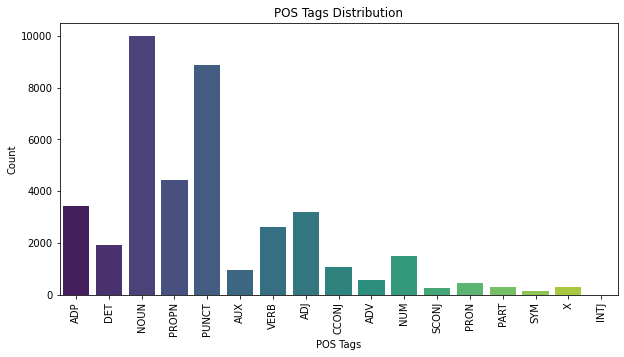

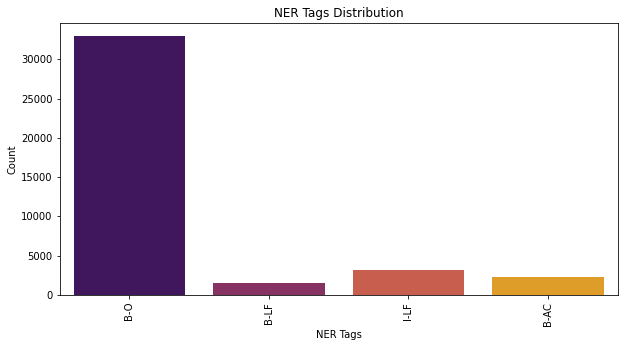

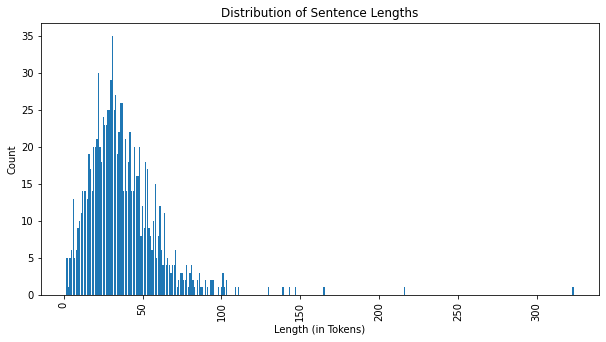

In [10]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Creating lists of all POS and NER tags from the training dataset
complete_pos_tags = [tag for sentence in datasets['train']['pos_tags'] for tag in sentence]
complete_ner_tags = [tag for sentence in datasets['train']['ner_tags'] for tag in sentence]

# Getting counts of each POS and NER tag
pos_tag_frequencies = Counter(complete_pos_tags)
ner_tag_frequencies = Counter(complete_ner_tags)

# Function creating a bar plot having color shades
def generate_bar_plot(data, title, x_label, y_label, color_palette):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(data.keys()), y=list(data.values()), palette=color_palette)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)
    plt.show()

# Defining a color palette
color_palette = sns.color_palette("viridis", len(pos_tag_frequencies))

# Creating a bar chart to show the distribution of POS tags with color shades
generate_bar_plot(pos_tag_frequencies, 'POS Tags Distribution', 'POS Tags', 'Count', color_palette)

# Define a new color palette for NER tags
color_palette_ner = sns.color_palette("inferno", len(ner_tag_frequencies))

# Creating a bar chart to show the distribution of NER tags with color shades
generate_bar_plot(ner_tag_frequencies, 'NER Tags Distribution', 'NER Tags', 'Count', color_palette_ner)

def generate_normal_bar_plot(data, title, x_label, y_label):
    plt.figure(figsize=(10, 5))
    plt.bar(data.keys(), data.values())
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)
    plt.show()


# Calculation of number of tokens in each sentence
sentence_token_counts = [len(sentence) for sentence in datasets['train']['tokens']]
sentence_length_frequencies = Counter(sentence_token_counts)

# Generating a bar plot for sentence length distribution
generate_normal_bar_plot(sentence_length_frequencies, 'Distribution of Sentence Lengths', 'Length (in Tokens)', 'Count')








### Information about graph


+ POS Tags Distribution Chart :-
In this chart, after analyzing all the Parts Of Speech (POS) in the dataset, we found that the most frequently used POS is a Noun.

+ NER Tag Distribution Chart :-
In this chart, after analyzing Named Entity Recognition Tags, we found that the most frequently used NER Tag is B-O

+ Distribution of Sentence Lengths Chart :-
This bar plot illustrates the frequency of sentences at different lengths, allowing you to understand the distribution of sentence lengths in dataset.


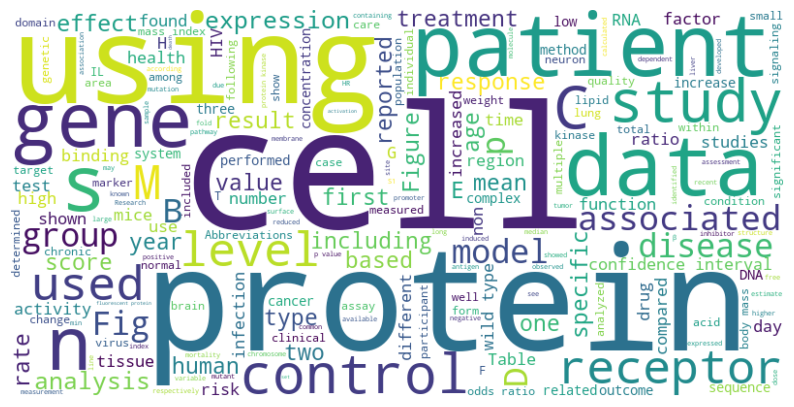

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate tokens from all subsets
all_tokens = []
for subset in [datasets['train'], datasets['validation'], datasets['test']]:
    all_tokens.extend(subset['tokens'])

# Join tokens into a single string
all_tokens_text = ' '.join([' '.join(tokens) for tokens in all_tokens])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Information about graph
+ Word Cloud :-
The resulting word cloud graphically represents the most common words in the dataset. Larger words indicate higher frequency, providing a quick visual summary of which terms are most prevalent across the dataset's training, validation, and test subsets.



# **2.1 Experiment_1 : Comparing features/vectorization methods**

# 2.1.1 Experimental setup: CharNGram(Vectoriser) + FFNN(Algorithm)

2024-04-26 08:19:19.900671: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 8824000000 exceeds 10% of free system memory.


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8292 - loss: 0.6724
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8769 - loss: 0.3497
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8917 - loss: 0.3035
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8968 - loss: 0.2847
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9013 - loss: 0.2721
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9057 - loss: 0.2605
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9046 - loss: 0.2612
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9073 - loss: 0.2494
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9080 - loss: 0.2464
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9069 - loss: 0.2455
  25/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8881 - loss: 0.3267    

2024-04-26 08:20:44.766816: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 8824000000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9053 - loss: 0.2497
Accuracy: 0.9115999937057495
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Average F1 Score: 0.8986115625987185


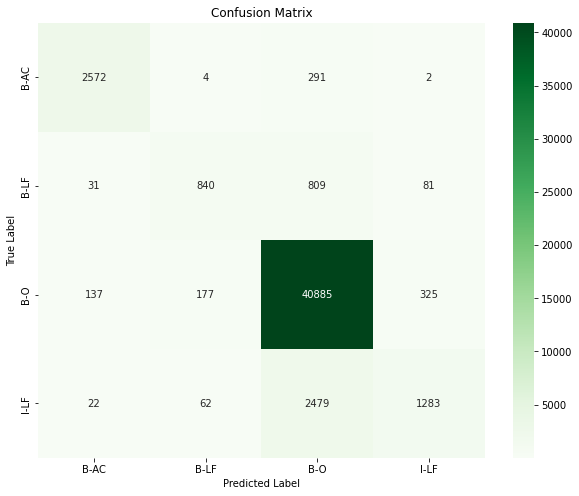

In [19]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Preprocessing the data
# Flatten the list of tokens and NER tags
tk = [token for sublist in combined_datasets['tokens'] for token in sublist]
ner_tags = [tag for sublist in combined_datasets['ner_tags'] for tag in sublist]

# Step 2: Vectorizing the data using CharNGram
# Using simple CountVectorizer with character n-grams
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 4))
X = vectorizer.fit_transform(tk).toarray()

# Step 3: Prepare the labels
# Encoding the NER tags with numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(ner_tags)
y = to_categorical(y_encoded)

# Step 4: Building of FFNN model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Training of the model
# To demonstrate we'll use the same data for training and evaluation
model.fit(X, y, epochs=10, batch_size=64)

# Step 6: Evaluating the model

# Using separate training and testing datasets
loss, accuracy = model.evaluate(X, y)
print(f'Accuracy: {accuracy}')

# Prediction of probabilities for each class
y_pred_probabilities = model.predict(X)

# Taking highest probability as the predicted label
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Decoding the true labels
true_labels = label_encoder.inverse_transform(y_encoded)

# Decoding the predicted labels
predicted_labels = label_encoder.inverse_transform(y_pred)

# Calculation of F1 score
f1_scores = f1_score(true_labels, predicted_labels, average='weighted')

print("Average F1 Score:", f1_scores)

# Calculation of confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Ploting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 2.1.2 Experimental setup: Word2Vec (Vectoriser) + FFNN (Algorithm)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1725 - loss: 0.5730 - val_accuracy: 0.0794 - val_loss: 0.2894
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2703 - loss: 0.2748 - val_accuracy: 0.6190 - val_loss: 0.2819
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6233 - loss: 0.2757 - val_accuracy: 0.8889 - val_loss: 0.2818
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7115 - loss: 0.2912 - val_accuracy: 0.8810 - val_loss: 0.2818
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7526 - loss: 0.3060 - val_accuracy: 0.8968 - val_loss: 0.2818
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7057 - loss: 0.3161 - val_accuracy: 0.8810 - val_loss: 0.2818
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7168 - loss: 0.2878 - val_accuracy: 0.8651 - val_loss: 0.2818
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7004 - loss: 0.2952 - val_accuracy: 0.8651 - val_loss

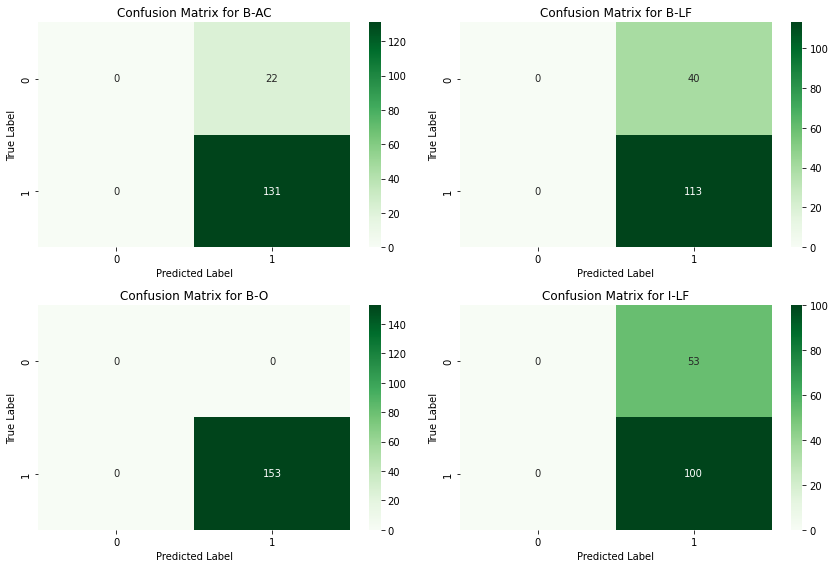

In [31]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MultiLabelBinarizer
import gensim.downloader as api

# Loading pre-trained word2vec model
word_vectors = api.load("word2vec-google-news-300")

# Loading dataset
train_data = datasets['train']
val_data = datasets['validation']
test_data = datasets['test']

# Obtaining tokens from the dataset
train_tokens = train_data['tokens']
val_tokens = val_data['tokens']
test_tokens = test_data['tokens']

# Function to convert tokens to word embeddings using word2vec
def tokens_to_embeddings(tokens):
    embeddings = []
    for token in tokens:
        # Checking if token is in the word2vec vocabulary
        if token in word_vectors:
            embeddings.append(word_vectors[token])
        else:
            # If token is not in vocabulary, use zero vector
            embeddings.append(np.zeros(word_vectors.vector_size))
    return np.mean(embeddings, axis=0)

# Tokens to word embeddings for train, validation, and test sets
X_train = np.array([tokens_to_embeddings(tokens) for tokens in train_tokens])
X_val = np.array([tokens_to_embeddings(tokens) for tokens in val_tokens])
X_test = np.array([tokens_to_embeddings(tokens) for tokens in test_tokens])

# Extract NER tags
all_tags = [tag for seq in train_data['ner_tags'] for tag in seq]

# NER tags to binary labels
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['ner_tags'])
y_val = mlb.transform(val_data['ner_tags'])
y_test = mlb.transform(test_data['ner_tags'])

# Defining FFNN model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(word_vectors.vector_size,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(mlb.classes_), activation='sigmoid')
])

# Compilation of model
model.compile(optimizer='adam',
              loss='hinge',
              metrics=['accuracy'])

# Training of model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val, y_val))

# Evaluation of model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

from sklearn.metrics import f1_score

# Prediction of labels for validation set
y_val_pred = model.predict(X_val)

# Changing predicted probabilities to binary labels
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

#  F1 score for each class
f1_scores = f1_score(y_val, y_val_pred_binary, average=None)

# Average F1 score calculation
average_f1_score = f1_scores.mean()

print("Average F1 Score:", average_f1_score)

import tensorflow as tf
from sklearn.metrics import multilabel_confusion_matrix

# Assuming you have already defined and trained your model

# Generating the predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Generate multi-label confusion matrices for the test set
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Determine the layout for the subplots (2 rows with 2 columns)
rows = 2
columns = 2

# Create subplots for each confusion matrix
fig, axes = plt.subplots(rows, columns, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes for easier access

# Create a heatmap for each confusion matrix
for i, label in enumerate(mlb.classes_[:4]):  # Assuming there are at least 4 classes
    sns.heatmap(
        confusion_matrices[i],
        annot=True,
        fmt='d',
        cmap='Greens',
        ax=axes[i]
    )

    # Set labels and titles
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_title(f'Confusion Matrix for {label}')

# Hide unused axes if there are fewer than 4 classes
for j in range(len(mlb.classes_), 4):
    axes[j].axis('off')  # Hide axes that aren't used

# Adjust layout to ensure subplots are spaced correctly
plt.tight_layout()
plt.show()



### Conclusion :- 
+ After performing the above two experiments if we compare the average F1 score of Word2Vec+FFNN is better performing than    CharNgram,hence it will be used for next experiment

# **2.2 Experiment_2 : Comparing algorithms with same Vectoriser**

# 2.2.1 Experimental setup 1 Word2Vec(Vectoriser) + SVM(Algorithmn)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.89      1.00      0.94       191

    accuracy                           0.89       215
   macro avg       0.44      0.50      0.47       215
weighted avg       0.79      0.89      0.84       215

Average F1 Score: 0.8358574865391224


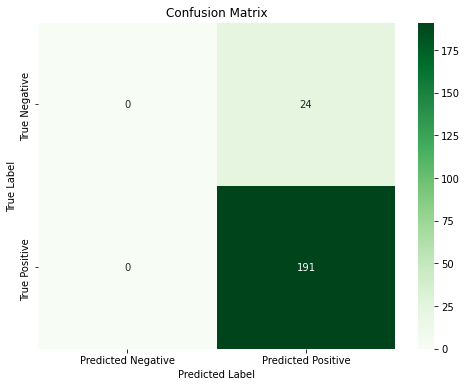

In [32]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to check if a sentence contains a named entity
def contains_named_entity(ner_tags):
    return any(tag != 'B-O' for tag in ner_tags)

# Preparing sentences and labels
sentences = datasets['train']['tokens']
ner_tags = datasets['train']['ner_tags']
labels = [contains_named_entity(tags) for tags in ner_tags]

# Conversion of boolean labels to integers (1 for True, 0 for False)
labels = np.array([int(label) for label in labels])

# Training of a Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to create a feature vector for a sentence by averaging its word vectors
def sentence_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(vectors, axis=0)

# Creating feature vectors for each sentence
X = np.array([sentence_vector(sentence, model) for sentence in sentences])

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Training of an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels
svm_classifier.fit(X_train, y_train)

# Prediction of testing set
y_pred = svm_classifier.predict(X_test)

# Evaluation of classifier
report = classification_report(y_test, y_pred, output_dict=True)
f1_scores = report["weighted avg"]["f1-score"]

# Displaying the classification report
print(classification_report(y_test, y_pred))

#  Average F1 score
print("Average F1 Score:", f1_scores)

# Creation of confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative ', 'True Positive '])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# 2.2.2 Word2Vec + FFNN

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2544 - loss: 0.5670 - val_accuracy: 0.0794 - val_loss: 0.2905
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3263 - loss: 0.3040 - val_accuracy: 0.9048 - val_loss: 0.2819
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6896 - loss: 0.2593 - val_accuracy: 0.9206 - val_loss: 0.2818
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7673 - loss: 0.2933 - val_accuracy: 0.9206 - val_loss: 0.2818
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8136 - loss: 0.2802 - val_accuracy: 0.9206 - val_loss: 0.2818
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8005 - loss: 0.2871 - val_accuracy: 0.9286 - val_loss: 0.2818
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8025 - loss: 0.2862 - val_accuracy: 0.9048 - val_loss: 0.2818
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7601 - loss: 0.2880 - val_accuracy: 0.9048 - val_loss

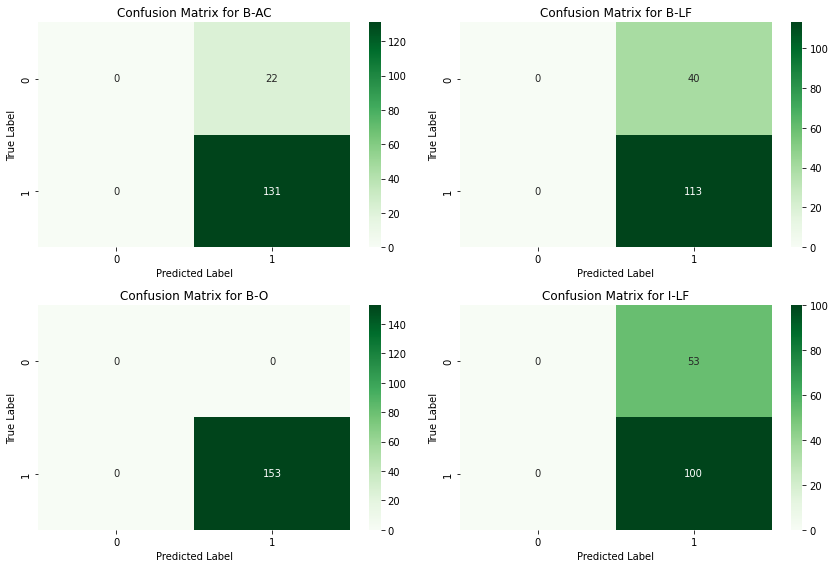

In [30]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MultiLabelBinarizer
import gensim.downloader as api

# Loading pre-trained word2vec model
word_vectors = api.load("word2vec-google-news-300")

# Loading dataset
train_data = datasets['train']
val_data = datasets['validation']
test_data = datasets['test']

# Obtaining tokens from the dataset
train_tokens = train_data['tokens']
val_tokens = val_data['tokens']
test_tokens = test_data['tokens']

# Function to convert tokens to word embeddings using word2vec
def tokens_to_embeddings(tokens):
    embeddings = []
    for token in tokens:
        # Checking if token is in the word2vec vocabulary
        if token in word_vectors:
            embeddings.append(word_vectors[token])
        else:
            # If token is not in vocabulary, use zero vector
            embeddings.append(np.zeros(word_vectors.vector_size))
    return np.mean(embeddings, axis=0)

# Tokens to word embeddings for train, validation, and test sets
X_train = np.array([tokens_to_embeddings(tokens) for tokens in train_tokens])
X_val = np.array([tokens_to_embeddings(tokens) for tokens in val_tokens])
X_test = np.array([tokens_to_embeddings(tokens) for tokens in test_tokens])

# Extract NER tags
all_tags = [tag for seq in train_data['ner_tags'] for tag in seq]

# NER tags to binary labels
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['ner_tags'])
y_val = mlb.transform(val_data['ner_tags'])
y_test = mlb.transform(test_data['ner_tags'])

# Defining FFNN model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(word_vectors.vector_size,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(mlb.classes_), activation='sigmoid')
])

# Compilation of model
model.compile(optimizer='adam',
              loss='hinge',
              metrics=['accuracy'])

# Training of model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val, y_val))

# Evaluation of model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

from sklearn.metrics import f1_score

# Prediction of labels for validation set
y_val_pred = model.predict(X_val)

# Changing predicted probabilities to binary labels
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

#  F1 score for each class
f1_scores = f1_score(y_val, y_val_pred_binary, average=None)

# Average F1 score calculation
average_f1_score = f1_scores.mean()

print("Average F1 Score:", average_f1_score)

import tensorflow as tf
from sklearn.metrics import multilabel_confusion_matrix

# Assuming you have already defined and trained your model

# Generating the predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Generate multi-label confusion matrices for the test set
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Determine the layout for the subplots (2 rows with 2 columns)
rows = 2
columns = 2

# Create subplots for each confusion matrix
fig, axes = plt.subplots(rows, columns, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes for easier access

# Create a heatmap for each confusion matrix
for i, label in enumerate(mlb.classes_[:4]):  # Assuming there are at least 4 classes
    sns.heatmap(
        confusion_matrices[i],
        annot=True,
        fmt='d',
        cmap='Greens',
        ax=axes[i]
    )

    # Set labels and titles
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_title(f'Confusion Matrix for {label}')

# Hide unused axes if there are fewer than 4 classes
for j in range(len(mlb.classes_), 4):
    axes[j].axis('off')  # Hide axes that aren't used

# Adjust layout to ensure subplots are spaced correctly
plt.tight_layout()
plt.show()



### Conclusion :-
+ After executting Word2Vec with two different algorithms, the average F1 score it shows that FFNN is performing better than SVM, hence it will be used further

 # **2.3 Experiment_3 : Comparing loss functions/optimizers**

In [14]:

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MultiLabelBinarizer
import gensim.downloader as api

# Loading pre-trained word2vec model
word_vectors = api.load("word2vec-google-news-300")

# Loading the dataset
train_data = datasets['train']
val_data = datasets['validation']
test_data = datasets['test']

# Getting tokens from the dataset
train_tokens = train_data['tokens']
val_tokens = val_data['tokens']
test_tokens = test_data['tokens']

# Function to convert tokens to word embeddings using word2vec
def tokens_to_embeddings(tokens):
    embeddings = []
    for token in tokens:
        # Checking if token is in the word2vec vocabulary
        if token in word_vectors:
            embeddings.append(word_vectors[token])
        else:
            # If token is not in vocabulary, use zero vector
            embeddings.append(np.zeros(word_vectors.vector_size))
    return np.mean(embeddings, axis=0)

# Changing tokens to word embeddings for train, validation, and test sets
X_train = np.array([tokens_to_embeddings(tokens) for tokens in train_tokens])
X_val = np.array([tokens_to_embeddings(tokens) for tokens in val_tokens])
X_test = np.array([tokens_to_embeddings(tokens) for tokens in test_tokens])

# Extracting NER tags
all_tags = [tag for seq in train_data['ner_tags'] for tag in seq]

# Changing NER tags to binary labels
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['ner_tags'])
y_val = mlb.transform(val_data['ner_tags'])
y_test = mlb.transform(test_data['ner_tags'])

# Definig FFNN model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(word_vectors.vector_size,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(mlb.classes_), activation='sigmoid')
])


In [15]:
optimizer_list=['adam','sgd','rmsprop','adagrad']
optim_dict={}
for optim in optimizer_list:

    # Compiling model
    model.compile(optimizer=optim,
                  loss='hinge',
                  metrics=['accuracy'])
    
    # Training model
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_data=(X_val, y_val))
    
    # Evaluating model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test Accuracy:({optim})', test_acc)
    optim_dict[optim]=test_acc

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1240 - loss: 0.5664 - val_accuracy: 0.0794 - val_loss: 0.2864
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2091 - loss: 0.2663 - val_accuracy: 0.7381 - val_loss: 0.2818
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6859 - loss: 0.2803 - val_accuracy: 0.8810 - val_loss: 0.2818
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7798 - loss: 0.2943 - val_accuracy: 0.8968 - val_loss: 0.2818
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7742 - loss: 0.2794 - val_accuracy: 0.8968 - val_loss: 0.2818
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7725 - loss: 0.2968 - val_accuracy: 0.8889 - val_loss: 0.2818
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7938 - loss: 0.2858 - val_accuracy: 0.8810 - val_loss: 0.2818
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7122 - loss: 0.2767 - val_accuracy: 0.8810 - val_loss

In [16]:
optim_dict

{'adam': 0.8104575276374817,
 'sgd': 0.8039215803146362,
 'rmsprop': 0.5620915293693542,
 'adagrad': 0.5490196347236633}

In [17]:
max=max(optim_dict,key=optim_dict.get)
max

'adam'

In [20]:
lossfn_list=['binary_crossentropy','categorical_crossentropy','hinge']
lossfn_dict={}
for lfn in lossfn_list:

    # Compile the model
    model.compile(optimizer='adam',
                  loss=lfn,
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_data=(X_val, y_val))
    
    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test Accuracy:({lfn})', test_acc)
    lossfn_dict[lfn]=test_acc

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1267 - loss: 44075.4570 - val_accuracy: 0.0794 - val_loss: 38810.0977
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1147 - loss: 36190.0547 - val_accuracy: 0.0794 - val_loss: 31812.4414
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1067 - loss: 29904.4199 - val_accuracy: 0.0794 - val_loss: 26168.3223
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0995 - loss: 24910.1445 - val_accuracy: 0.0794 - val_loss: 21470.0547
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1019 - loss: 19666.2715 - val_accuracy: 0.0794 - val_loss: 17632.7227
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0978 - loss: 15560.4121 - val_accuracy: 0.0794 - val_loss: 14398.6768
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1073 - loss: 14090.6016 - val_accuracy: 0.0794 - val_loss: 11527.7383
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

# Conclusion
+ Hinge is the best loss function giving maximum test accuracy

# **2.4 Experiment_4 Analysing various epochs and batch sizes**

# Experiment_4.1

In [21]:

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MultiLabelBinarizer
import gensim.downloader as api

# Loading pre-trained word2vec model
word_vectors = api.load("word2vec-google-news-300")

# Loading the dataset
train_data = datasets['train']
val_data = datasets['validation']
test_data = datasets['test']

# Obtaining tokens from the dataset
train_tokens = train_data['tokens']
val_tokens = val_data['tokens']
test_tokens = test_data['tokens']

# Function to convert tokens to word embeddings using word2vec
def tokens_to_embeddings(tokens):
    embeddings = []
    for token in tokens:
        # Checking if token is in the word2vec vocabulary
        if token in word_vectors:
            embeddings.append(word_vectors[token])
        else:
            # If token is not in vocabulary, use zero vector
            embeddings.append(np.zeros(word_vectors.vector_size))
    return np.mean(embeddings, axis=0)

# Conversion of tokens to word embeddings for train, validation, and test sets
X_train = np.array([tokens_to_embeddings(tokens) for tokens in train_tokens])
X_val = np.array([tokens_to_embeddings(tokens) for tokens in val_tokens])
X_test = np.array([tokens_to_embeddings(tokens) for tokens in test_tokens])

# Extracting NER tags
all_tags = [tag for seq in train_data['ner_tags'] for tag in seq]

# NER tags to binary labels Conversion
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['ner_tags'])
y_val = mlb.transform(val_data['ner_tags'])
y_test = mlb.transform(test_data['ner_tags'])

# Defining FFNN model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(word_vectors.vector_size,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(mlb.classes_), activation='sigmoid')
])


In [22]:


# Compiling model
model.compile(optimizer='adam',
              loss='hinge',
              metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val, y_val))

# Evaluating model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)



Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3955 - loss: 0.5586 - val_accuracy: 0.0794 - val_loss: 0.2849
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3318 - loss: 0.2766 - val_accuracy: 0.6984 - val_loss: 0.2818
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6268 - loss: 0.2645 - val_accuracy: 0.8889 - val_loss: 0.2818
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7614 - loss: 0.2798 - val_accuracy: 0.8968 - val_loss: 0.2818
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7669 - loss: 0.2805 - val_accuracy: 0.8968 - val_loss: 0.2818
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7697 - loss: 0.2499 - val_accuracy: 0.8889 - val_loss: 0.2818
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7431 - loss: 0.2791 - val_accuracy: 0.8889 - val_loss: 0.2818
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7547 - loss: 0.2954 - val_accuracy: 0.8889 - val_loss

In [23]:


# Compiling model
model.compile(optimizer='adam',
              loss='hinge',
              metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_data=(X_val, y_val))

# Evaluating model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)



Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7026 - loss: 0.2692 - val_accuracy: 0.7698 - val_loss: 0.2820
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5830 - loss: 0.3046 - val_accuracy: 0.5635 - val_loss: 0.2823
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4541 - loss: 0.2784 - val_accuracy: 0.5873 - val_loss: 0.2825
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5726 - loss: 0.2640 - val_accuracy: 0.7857 - val_loss: 0.2826
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6586 - loss: 0.2613 - val_accuracy: 0.7063 - val_loss: 0.2830
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6040 - loss: 0.2921 - val_accuracy: 0.6667 - val_loss: 0.2834
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6087 - loss: 0.2698 - val_accuracy: 0.6032 - val_loss: 0.2839
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5253 - loss: 0.2674 - val_accuracy: 0.4365 - val_loss

In [24]:


# Compiling model
model.compile(optimizer='adam',
              loss='hinge',
              metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_val, y_val))

# Evaluating model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)



Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8331 - loss: 0.2460 - val_accuracy: 0.8175 - val_loss: 0.2810
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7519 - loss: 0.2545 - val_accuracy: 0.8730 - val_loss: 0.2835
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8058 - loss: 0.2694 - val_accuracy: 0.8810 - val_loss: 0.2830
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8463 - loss: 0.2559 - val_accuracy: 0.8889 - val_loss: 0.2823
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.2415 - val_accuracy: 0.8889 - val_loss: 0.2817
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8631 - loss: 0.2387 - val_accuracy: 0.7698 - val_loss: 0.2764
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7678 - loss: 0.2499 - val_accuracy: 0.8810 - val_loss: 0.2806
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8558 - loss: 0.2689 - val_accuracy: 0.8968 - val_loss

# Experimet_4.2

In [25]:


# Compiling model
model.compile(optimizer='adam',
              loss='hinge',
              metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=16,
                    validation_data=(X_val, y_val))

# Evaluating model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)



Epoch 1/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9049 - loss: 0.2484 - val_accuracy: 0.9048 - val_loss: 0.2765
Epoch 2/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8923 - loss: 0.2474 - val_accuracy: 0.9127 - val_loss: 0.2768
Epoch 3/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9160 - loss: 0.2094 - val_accuracy: 0.9127 - val_loss: 0.2763
Epoch 4/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - loss: 0.2348 - val_accuracy: 0.9206 - val_loss: 0.2743
Epoch 5/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9067 - loss: 0.2274 - val_accuracy: 0.8730 - val_loss: 0.2724
Epoch 6/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.2532 - val_accuracy: 0.8492 - val_loss: 0.2754
Epoch 7/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8861 - loss: 0.2290 - val_accuracy: 0.8730 - val_loss: 0.2743
Epoch 8/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8760 - loss: 0.2118 - val_accuracy: 0.8730 - val_loss:

In [26]:


# Compiling model
model.compile(optimizer='adam',
              loss='hinge',
              metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_val, y_val))

# Evaluating model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)



Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9139 - loss: 0.2306 - val_accuracy: 0.9286 - val_loss: 0.2727
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9217 - loss: 0.2333 - val_accuracy: 0.9286 - val_loss: 0.2769
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9296 - loss: 0.2216 - val_accuracy: 0.9048 - val_loss: 0.2676
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9075 - loss: 0.2253 - val_accuracy: 0.9127 - val_loss: 0.2738
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9295 - loss: 0.2121 - val_accuracy: 0.9286 - val_loss: 0.2762
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9261 - loss: 0.2295 - val_accuracy: 0.9206 - val_loss: 0.2719
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9202 - loss: 0.2254 - val_accuracy: 0.9206 - val_loss: 0.2735
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9344 - loss: 0.2147 - val_accuracy: 0.9206 - val_loss:

In [27]:


# Compiling model
model.compile(optimizer='adam',
              loss='hinge',
              metrics=['accuracy'])

# Training  model
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_data=(X_val, y_val))

# Evaluating model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)



Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9045 - loss: 0.2281 - val_accuracy: 0.9048 - val_loss: 0.2707
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8998 - loss: 0.2461 - val_accuracy: 0.9048 - val_loss: 0.2712
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9165 - loss: 0.2066 - val_accuracy: 0.9048 - val_loss: 0.2641
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9113 - loss: 0.2241 - val_accuracy: 0.9048 - val_loss: 0.2664
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9203 - loss: 0.2073 - val_accuracy: 0.9048 - val_loss: 0.2680
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8964 - loss: 0.2238 - val_accuracy: 0.9048 - val_loss: 0.2667
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9273 - loss: 0.2148 - val_accuracy: 0.8968 - val_loss: 0.2656
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9146 - loss: 0.2195 - val_accuracy: 0.9048 - val_loss

In [28]:


# Compiling model
model.compile(optimizer='adam',
              loss='hinge',
              metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(X_val, y_val))

# Evaluating model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)



Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9286 - loss: 0.2186 - val_accuracy: 0.8968 - val_loss: 0.2674
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9248 - loss: 0.2103 - val_accuracy: 0.8968 - val_loss: 0.2714
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9201 - loss: 0.2264 - val_accuracy: 0.9048 - val_loss: 0.2649
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9312 - loss: 0.2002 - val_accuracy: 0.9048 - val_loss: 0.2655
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9194 - loss: 0.2315 - val_accuracy: 0.9048 - val_loss: 0.2656
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9309 - loss: 0.1984 - val_accuracy: 0.8968 - val_loss: 0.2663
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9269 - loss: 0.2221 - val_accuracy: 0.9048 - val_loss: 0.2655
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9244 - loss: 0.2116 - val_accuracy: 0.9127 - val_loss: 0.2677
Epoch 9

### Conclusion :-
+ Epoch 15 is choosen as it has highest accuracy with significantly less time taken in comparison to epoch 20 and 10
+ Batch 32 is choosen as it as highest accuracy with significantly less time taken in comparison to batch 16 and 64

# **Experiment_3. Confusion matrix and error analysis**

#  3.1 Experimental setup: CharNGram(Vectoriser) + FFNN(Algorithm)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8258 - loss: 0.6773
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8796 - loss: 0.3437
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8910 - loss: 0.3042
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9001 - loss: 0.2746
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9013 - loss: 0.2689
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9028 - loss: 0.2654
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9071 - loss: 0.2536
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9059 - loss: 0.2506
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9090 - loss: 0.2446
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9050 - loss: 0.2468
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9055 - loss: 0.2472
Accuracy: 0.911899983882904
1563/1563 ━━━━━━━━━━━━━━━

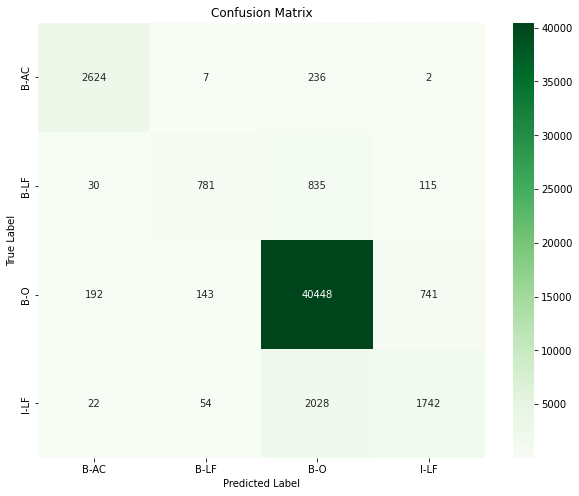

In [33]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Preprocessing  data
# Flatten the list of tokens and NER tags
tokens = [token for sublist in combined_datasets['tokens'] for token in sublist]
ner_tags = [tag for sublist in combined_datasets['ner_tags'] for tag in sublist]

# Step 2: Vectorization of  data using CharNGram
# Using CountVectorizer with character n-grams
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 4))
X = vectorizer.fit_transform(tokens).toarray()

# Step 3: Preparing labels
# Encoding NER tags with numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(ner_tags)
y = to_categorical(y_encoded)

# Step 4: Building FFNN model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Training model
# To demonstration, we'll use the same data for training and evaluation
model.fit(X, y, epochs=10, batch_size=64)

# Step 6: Evaluating model

# Using separate training and testing datasets
loss, accuracy = model.evaluate(X, y)
print(f'Accuracy: {accuracy}')

# Predicting probabilities for each class
y_pred_probabilities = model.predict(X)

# Selecting class with the highest probability as the predicted label
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Decoding true labels
true_labels = label_encoder.inverse_transform(y_encoded)

# Decoding predicted labels
predicted_labels = label_encoder.inverse_transform(y_pred)

# F1 score calculation
f1_scores = f1_score(true_labels, predicted_labels, average='weighted')

print("Average F1 Score:", f1_scores)

# Confusion matrix calculation
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Ploting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Calculating class-wise F1-scores
class_f1_scores = f1_score(true_labels, predicted_labels, average=None, labels=label_encoder.classes_)

# Creating dataframe to display class-wise F1-scores
import pandas as pd
f1_df = pd.DataFrame({
    'Class': label_encoder.classes_,
    'F1-Score': class_f1_scores
})

# Display class-wise F1-scores
print(f1_df)


  Class  F1-Score
0  B-AC  0.915129
1  B-LF  0.541059
2   B-O  0.950540
3  I-LF  0.481847


In [32]:
# Obtaining classes with low F1-scores (e.g., below a threshold like 0.5)
low_f1_classes = f1_df[f1_df['F1-Score'] < 0.5]

print("Classes with low F1-Scores:")
print(low_f1_classes)


Classes with low F1-Scores:
  Class  F1-Score
3  I-LF  0.481847


In [33]:
# Counting number of samples per class to identify imbalances
sample_counts = pd.Series(true_labels).value_counts()

print("Sample counts per class:")
print(sample_counts)

# Analyzing misclassified examples for low F1-score class
class_to_inspect = low_f1_classes.iloc[0]['Class']  # Example: pick the first low F1 class

misclassified_in_class = np.where((y_pred != y_encoded) & (true_labels == class_to_inspect))[0]

print(f"Misclassifications for class '{class_to_inspect}':")
for index in misclassified_in_class[:10]:  # limit to the first 10 misclassifications
    print(f"Token: {tokens[index]}, True Label: {true_labels[index]}, Predicted Label: {predicted_labels[index]}")


Sample counts per class:
B-O     41524
I-LF     3846
B-AC     2869
B-LF     1761
Name: count, dtype: int64
Misclassifications for class 'I-LF':
Token: Young, True Label: I-LF, Predicted Label: B-O
Token: Persons, True Label: I-LF, Predicted Label: B-O
Token: rate, True Label: I-LF, Predicted Label: B-O
Token: rate, True Label: I-LF, Predicted Label: B-O
Token: CO2, True Label: I-LF, Predicted Label: B-O
Token: concentration, True Label: I-LF, Predicted Label: B-O
Token: cell, True Label: I-LF, Predicted Label: B-O
Token: transplantation, True Label: I-LF, Predicted Label: B-O
Token: planar, True Label: I-LF, Predicted Label: B-LF
Token: imaging, True Label: I-LF, Predicted Label: B-O


# 3.2 Experimental setup 2 Word2Vec (Vectoriser)+ FFNN(Algorithm)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3137 - loss: 0.5660 - val_accuracy: 0.9206 - val_loss: 0.2861
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5106 - loss: 0.2805 - val_accuracy: 0.9127 - val_loss: 0.2818
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7401 - loss: 0.2666 - val_accuracy: 0.9206 - val_loss: 0.2818
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8342 - loss: 0.2772 - val_accuracy: 0.9127 - val_loss: 0.2818
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8135 - loss: 0.2748 - val_accuracy: 0.9206 - val_loss: 0.2818
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8343 - loss: 0.2892 - val_accuracy: 0.9127 - val_loss: 0.2818
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8161 - loss: 0.2869 - val_accuracy: 0.9127 - val_loss: 0.2818
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8133 - loss: 0.2563 - val_accuracy: 0.9127 - val_loss

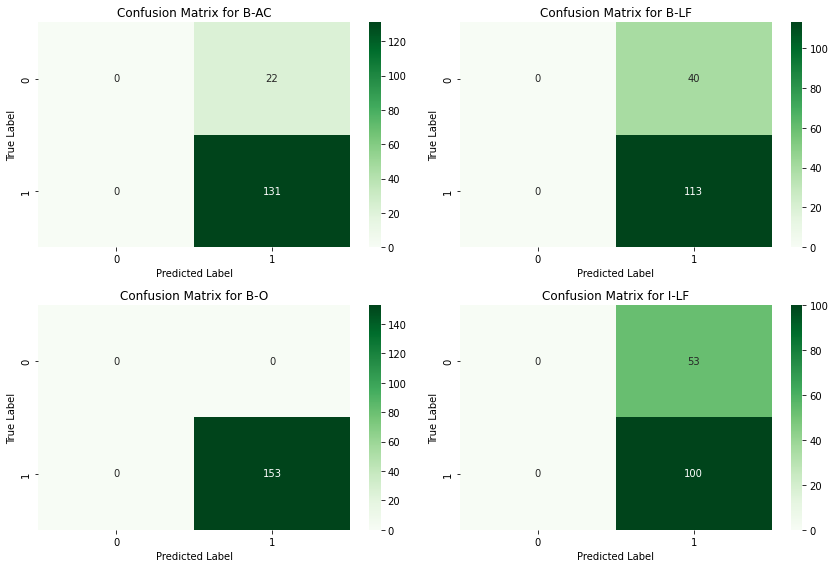

In [34]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MultiLabelBinarizer
import gensim.downloader as api

# Loading pre-trained word2vec model
word_vectors = api.load("word2vec-google-news-300")

# Loading dataset
train_data = datasets['train']
val_data = datasets['validation']
test_data = datasets['test']

# Obtaining tokens from the dataset
train_tokens = train_data['tokens']
val_tokens = val_data['tokens']
test_tokens = test_data['tokens']

# Function to convert tokens to word embeddings using word2vec
def tokens_to_embeddings(tokens):
    embeddings = []
    for token in tokens:
        # Checking if token is in the word2vec vocabulary
        if token in word_vectors:
            embeddings.append(word_vectors[token])
        else:
            # If token is not in vocabulary, use zero vector
            embeddings.append(np.zeros(word_vectors.vector_size))
    return np.mean(embeddings, axis=0)

# Tokens to word embeddings for train, validation, and test sets
X_train = np.array([tokens_to_embeddings(tokens) for tokens in train_tokens])
X_val = np.array([tokens_to_embeddings(tokens) for tokens in val_tokens])
X_test = np.array([tokens_to_embeddings(tokens) for tokens in test_tokens])

# Extract NER tags
all_tags = [tag for seq in train_data['ner_tags'] for tag in seq]

# NER tags to binary labels
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['ner_tags'])
y_val = mlb.transform(val_data['ner_tags'])
y_test = mlb.transform(test_data['ner_tags'])

# Defining FFNN model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(word_vectors.vector_size,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(mlb.classes_), activation='sigmoid')
])

# Compilation of model
model.compile(optimizer='adam',
              loss='hinge',
              metrics=['accuracy'])

# Training of model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val, y_val))

# Evaluation of model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

from sklearn.metrics import f1_score

# Prediction of labels for validation set
y_val_pred = model.predict(X_val)

# Changing predicted probabilities to binary labels
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

#  F1 score for each class
f1_scores = f1_score(y_val, y_val_pred_binary, average=None)

# Average F1 score calculation
average_f1_score = f1_scores.mean()

print("Average F1 Score:", average_f1_score)

import tensorflow as tf
from sklearn.metrics import multilabel_confusion_matrix

# Assuming you have already defined and trained your model

# Generating the predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Generate multi-label confusion matrices for the test set
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Determine the layout for the subplots (2 rows with 2 columns)
rows = 2
columns = 2

# Create subplots for each confusion matrix
fig, axes = plt.subplots(rows, columns, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes for easier access

# Create a heatmap for each confusion matrix
for i, label in enumerate(mlb.classes_[:4]):  # Assuming there are at least 4 classes
    sns.heatmap(
        confusion_matrices[i],
        annot=True,
        fmt='d',
        cmap='Greens',
        ax=axes[i]
    )

    # Set labels and titles
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_title(f'Confusion Matrix for {label}')

# Hide unused axes if there are fewer than 4 classes
for j in range(len(mlb.classes_), 4):
    axes[j].axis('off')  # Hide axes that aren't used

# Adjust layout to ensure subplots are spaced correctly
plt.tight_layout()
plt.show()



In [35]:
# Class-wise F1-scores calculation
class_f1_scores = f1_score(y_val, y_val_pred_binary, average=None)

# Generating a DataFrame to organize the F1-scores by class
import pandas as pd
f1_df = pd.DataFrame({
    'Class': mlb.classes_,
    'F1-Score': class_f1_scores
})

print("Class-wise F1-Scores:")
print(f1_df)


Class-wise F1-Scores:
  Class  F1-Score
0  B-AC  0.958678
1  B-LF  0.889868
2   B-O  1.000000
3  I-LF  0.833333


In [36]:
# Seting threshold to identify classes with low F1-scores
threshold = 0.85  # Example threshold
low_f1_classes = f1_df[f1_df['F1-Score'] < threshold]

print("Classes with Low F1-Scores:")
print(low_f1_classes)


Classes with Low F1-Scores:
  Class  F1-Score
3  I-LF  0.833333


In [37]:


# Function to print detailed comparisons of true vs predicted values with a limit of 2 samples
def print_true_vs_pred_comparison(class_name, max_samples=2):
    class_index = mlb.classes_.tolist().index(class_name)

    # Finding indices with misclassifications for this class
    misclassified_indices = np.where(
        y_val_pred_binary[:, class_index] != y_val[:, class_index]
    )[0]

    # Limiting number of samples to the specified maximum
    num_samples_to_print = min(max_samples, len(misclassified_indices))

    print(f"Comparisons for class '{class_name}' (up to {num_samples_to_print} samples):")
    for index in misclassified_indices[:num_samples_to_print]:
        # Obtaining the true and predicted values for this index
        true_labels = y_val[index]
        predicted_labels = y_val_pred_binary[index]

        # Generating human-readable representation of the labels
        true_value_str = ' '.join([mlb.classes_[i] for i, label in enumerate(true_labels) if label == 1])
        predicted_value_str = ' '.join([mlb.classes_[i] for i, label in enumerate(predicted_labels) if label == 1])

        # Display relevant information
        print(f"Index: {index}")
        print(f"Tokens: {val_tokens[index]}")
        print(f"True Value: {true_value_str}")
        print(f"Predicted Value: {predicted_value_str}")
        print("-" * 50)

# Display up to 2 samples for each class
for class_name in mlb.classes_:
    print_true_vs_pred_comparison(class_name, max_samples=2)


Comparisons for class 'B-AC' (up to 2 samples):
Index: 20
Tokens: ['A', '15', '-', 's', 'rest', 'period', 'preceded', 'and', 'followed', 'each', 'block', '.']
True Value: B-O
Predicted Value: B-AC B-LF B-O I-LF
--------------------------------------------------
Index: 46
Tokens: ['We', 'inserted', 'the', 'CAN1', 'and', 'URA3', 'genes', ',', 'two', 'counter', '-', 'selectable', 'markers', ',', '∼10', 'kb', 'from', 'the', 'telomere', 'of', 'ChrXV', '-', 'L', '(', 'Figure', '1A', ')', '.']
True Value: B-O
Predicted Value: B-AC B-LF B-O I-LF
--------------------------------------------------
Comparisons for class 'B-LF' (up to 2 samples):
Index: 12
Tokens: ['A', 'specialized', 'meiotic', 'DSBR', 'mode', 'is', 'engaged', 'at', 'the', 'onset', 'of', 'meiotic', 'prophase', ',', 'coincident', 'with', 'assembly', 'of', 'meiotic', 'chromosome', 'axis', 'structures', '.']
True Value: B-AC B-O
Predicted Value: B-AC B-LF B-O I-LF
--------------------------------------------------
Index: 20
Tokens: 

# 3.3 Experiment setup 3 Word2Vec(Vectoriser) + SVM(Algorithm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.89      1.00      0.94       191

    accuracy                           0.89       215
   macro avg       0.44      0.50      0.47       215
weighted avg       0.79      0.89      0.84       215

Average F1 Score: 0.8358574865391224


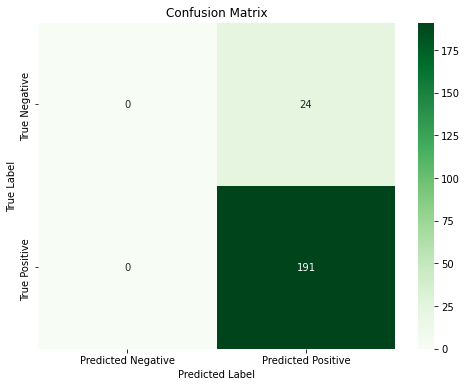

In [38]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to determine if a sentence contains a named entity
def contains_named_entity(ner_tags):
    return any(tag != 'B-O' for tag in ner_tags)

# Preparing sentences and labels
sentences = datasets['train']['tokens']
ner_tags = datasets['train']['ner_tags']
labels = [contains_named_entity(tags) for tags in ner_tags]

# Boolean labels to integers (1 for True, 0 for False)
labels = np.array([int(label) for label in labels])

# Training a Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to create a feature vector for a sentence by averaging its word vectors
def sentence_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(vectors, axis=0)

# Generating feature vectors for each sentence
X = np.array([sentence_vector(sentence, model) for sentence in sentences])

# Spliting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Training SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels
svm_classifier.fit(X_train, y_train)

# Predicting the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluating  classifier
report = classification_report(y_test, y_pred, output_dict=True)
f1_scores = report["weighted avg"]["f1-score"]

# Display the classification report
print(classification_report(y_test, y_pred))

# Average F1 score calculation
print("Average F1 Score:", f1_scores)

# Creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative ', 'True Positive '])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [39]:
from sklearn.metrics import classification_report, f1_score
import pandas as pd

# Get the classification report
classification_summary = classification_report(y_test, y_pred, output_dict=True)

# Extract F1-scores for each class
class_f1_scores = {
    "Negative": classification_summary["0"]["f1-score"],  # Assuming 0 is Negative
    "Positive": classification_summary["1"]["f1-score"]  # Assuming 1 is Positive
}

# Getting class with the lowest F1-score
lowest_f1_class = min(class_f1_scores, key=class_f1_scores.get)

print("Class-wise F1-Scores:")
print(class_f1_scores)

print(f"\nClass with the lowest F1-score: {lowest_f1_class}")

# Displaying few misclassifications to understand where the errors occur
import numpy as np

def display_misclassified_samples(indices, y_true, y_pred, sentences, max_samples=2):
    """
    Display the details of misclassified samples, limited to a maximum number.
    """
    for i in indices[:max_samples]:
        print(f"Sample {i}:")
        print(f"Sentence: {' '.join(sentences[i])}")
        print(f"True Label: {'Positive' if y_true[i] == 1 else 'Negative'}")
        print(f"Predicted Label: {'Positive' if y_pred[i] == 1 else 'Negative'}")
        print("-" * 50)

# Obtaining indices for misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

print("Misclassified Samples:")
display_misclassified_samples(misclassified_indices, y_test, y_pred, sentences, max_samples=2)


Class-wise F1-Scores:
{'Negative': 0.0, 'Positive': 0.9408866995073891}

Class with the lowest F1-score: Negative
Misclassified Samples:
Sample 1:
Sentence: The following physiological traits were measured : stomatal conductance ( gs , mol H2O m-2 s-1 ) , transpiration rate ( E , mmol H2O m-2 s-1 ) , net photosynthetic rate ( PN , μmol m-2 s-1 ) and intercellular CO2 concentration CO2 ( Ci , μmol m-2 s-1 ) .
True Label: Negative
Predicted Label: Positive
--------------------------------------------------
Sample 22:
Sentence: Data are expressed as mean ± SEM , n = 3 from at least three independent experiments ; nd : not detected or below the limit of quantitation .
True Label: Negative
Predicted Label: Positive
--------------------------------------------------


# 3.4 Experiment setup 4 Word2Vec + FFNN

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3582 - loss: 0.5810 - val_accuracy: 0.0794 - val_loss: 0.2943
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4095 - loss: 0.2827 - val_accuracy: 0.9127 - val_loss: 0.2819
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5848 - loss: 0.3008 - val_accuracy: 0.9127 - val_loss: 0.2818
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7236 - loss: 0.2727 - val_accuracy: 0.8889 - val_loss: 0.2818
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7285 - loss: 0.2703 - val_accuracy: 0.9048 - val_loss: 0.2818
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7319 - loss: 0.2728 - val_accuracy: 0.8889 - val_loss: 0.2818
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7160 - loss: 0.2758 - val_accuracy: 0.8810 - val_loss: 0.2818
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7144 - loss: 0.2713 - val_accuracy: 0.8413 - val_loss

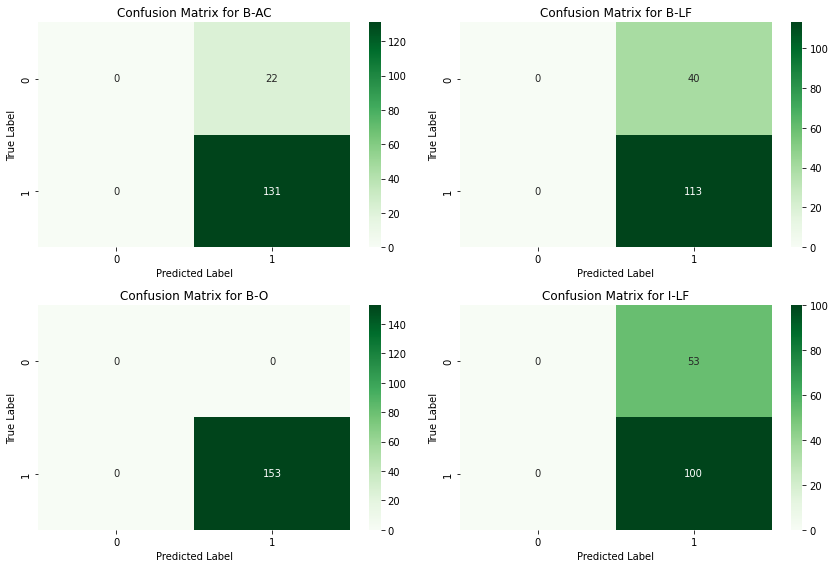

In [40]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MultiLabelBinarizer
import gensim.downloader as api

# Loading pre-trained word2vec model
word_vectors = api.load("word2vec-google-news-300")

# Loading dataset
train_data = datasets['train']
val_data = datasets['validation']
test_data = datasets['test']

# Obtaining tokens from the dataset
train_tokens = train_data['tokens']
val_tokens = val_data['tokens']
test_tokens = test_data['tokens']

# Function to convert tokens to word embeddings using word2vec
def tokens_to_embeddings(tokens):
    embeddings = []
    for token in tokens:
        # Checking if token is in the word2vec vocabulary
        if token in word_vectors:
            embeddings.append(word_vectors[token])
        else:
            # If token is not in vocabulary, use zero vector
            embeddings.append(np.zeros(word_vectors.vector_size))
    return np.mean(embeddings, axis=0)

# Tokens to word embeddings for train, validation, and test sets
X_train = np.array([tokens_to_embeddings(tokens) for tokens in train_tokens])
X_val = np.array([tokens_to_embeddings(tokens) for tokens in val_tokens])
X_test = np.array([tokens_to_embeddings(tokens) for tokens in test_tokens])

# Extract NER tags
all_tags = [tag for seq in train_data['ner_tags'] for tag in seq]

# NER tags to binary labels
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['ner_tags'])
y_val = mlb.transform(val_data['ner_tags'])
y_test = mlb.transform(test_data['ner_tags'])

# Defining FFNN model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(word_vectors.vector_size,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(mlb.classes_), activation='sigmoid')
])

# Compilation of model
model.compile(optimizer='adam',
              loss='hinge',
              metrics=['accuracy'])

# Training of model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val, y_val))

# Evaluation of model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

from sklearn.metrics import f1_score

# Prediction of labels for validation set
y_val_pred = model.predict(X_val)

# Changing predicted probabilities to binary labels
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

#  F1 score for each class
f1_scores = f1_score(y_val, y_val_pred_binary, average=None)

# Average F1 score calculation
average_f1_score = f1_scores.mean()

print("Average F1 Score:", average_f1_score)

import tensorflow as tf
from sklearn.metrics import multilabel_confusion_matrix

# Assuming you have already defined and trained your model

# Generating the predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Generate multi-label confusion matrices for the test set
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Determine the layout for the subplots (2 rows with 2 columns)
rows = 2
columns = 2

# Create subplots for each confusion matrix
fig, axes = plt.subplots(rows, columns, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes for easier access

# Create a heatmap for each confusion matrix
for i, label in enumerate(mlb.classes_[:4]):  # Assuming there are at least 4 classes
    sns.heatmap(
        confusion_matrices[i],
        annot=True,
        fmt='d',
        cmap='Greens',
        ax=axes[i]
    )

    # Set labels and titles
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_title(f'Confusion Matrix for {label}')

# Hide unused axes if there are fewer than 4 classes
for j in range(len(mlb.classes_), 4):
    axes[j].axis('off')  # Hide axes that aren't used

# Adjust layout to ensure subplots are spaced correctly
plt.tight_layout()
plt.show()



In [41]:
# Class-wise F1-scores
class_f1_scores = f1_score(y_val, y_val_pred_binary, average=None)

# Creating a DataFrame to organize the F1-scores by class
import pandas as pd
f1_df = pd.DataFrame({
    'Class': mlb.classes_,
    'F1-Score': class_f1_scores
})

print("Class-wise F1-Scores:")
print(f1_df)

Class-wise F1-Scores:
  Class  F1-Score
0  B-AC  0.958678
1  B-LF  0.889868
2   B-O  1.000000
3  I-LF  0.833333


In [42]:
# Threshold to identify classes with low F1-scores
threshold = 0.85  # Example threshold
low_f1_classes = f1_df[f1_df['F1-Score'] < threshold]

print("Classes with Low F1-Scores:")
print(low_f1_classes)

Classes with Low F1-Scores:
  Class  F1-Score
3  I-LF  0.833333


In [43]:


# Function to print detailed comparisons of true vs predicted values with a limit of 2 samples
def print_true_vs_pred_comparison(class_name, max_samples=2):
    class_index = mlb.classes_.tolist().index(class_name)

    # Finding indices with misclassifications for this class
    misclassified_indices = np.where(
        y_val_pred_binary[:, class_index] != y_val[:, class_index]
    )[0]

    # Limiting the number of samples to the specified maximum
    num_samples_to_print = min(max_samples, len(misclassified_indices))

    print(f"Comparisons for class '{class_name}' (up to {num_samples_to_print} samples):")
    for index in misclassified_indices[:num_samples_to_print]:
        # Geting the true and predicted values for this index
        true_labels = y_val[index]
        predicted_labels = y_val_pred_binary[index]

        # Creation of a human-readable representation of the labels
        true_value_str = ' '.join([mlb.classes_[i] for i, label in enumerate(true_labels) if label == 1])
        predicted_value_str = ' '.join([mlb.classes_[i] for i, label in enumerate(predicted_labels) if label == 1])

        # Displing relevant information
        print(f"Index: {index}")
        print(f"Tokens: {val_tokens[index]}")
        print(f"True Value: {true_value_str}")
        print(f"Predicted Value: {predicted_value_str}")
        print("-" * 50)

# Display up to 2 samples for each class
for class_name in mlb.classes_:
    print_true_vs_pred_comparison(class_name, max_samples=2)


Comparisons for class 'B-AC' (up to 2 samples):
Index: 20
Tokens: ['A', '15', '-', 's', 'rest', 'period', 'preceded', 'and', 'followed', 'each', 'block', '.']
True Value: B-O
Predicted Value: B-AC B-LF B-O I-LF
--------------------------------------------------
Index: 46
Tokens: ['We', 'inserted', 'the', 'CAN1', 'and', 'URA3', 'genes', ',', 'two', 'counter', '-', 'selectable', 'markers', ',', '∼10', 'kb', 'from', 'the', 'telomere', 'of', 'ChrXV', '-', 'L', '(', 'Figure', '1A', ')', '.']
True Value: B-O
Predicted Value: B-AC B-LF B-O I-LF
--------------------------------------------------
Comparisons for class 'B-LF' (up to 2 samples):
Index: 12
Tokens: ['A', 'specialized', 'meiotic', 'DSBR', 'mode', 'is', 'engaged', 'at', 'the', 'onset', 'of', 'meiotic', 'prophase', ',', 'coincident', 'with', 'assembly', 'of', 'meiotic', 'chromosome', 'axis', 'structures', '.']
True Value: B-AC B-O
Predicted Value: B-AC B-LF B-O I-LF
--------------------------------------------------
Index: 20
Tokens: 